In [1]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

#**Business Understanding**#

**Business Objective**</br>
*   Perusahaan mengindetifikasi customer berdasarkan RFM </br>
*   Personalized strategi marketing supaya lebih efisien </br>
</br>

**Business Questions / Problem Statement** </br>
*   Mensegmentasi customer berdasarkan perilakunya dan memberikan personalized strategi yang tepat </br>
</br>

**Define the Problem**
*   Input: recency, frequency, monetary
*   Output: segmentasi customer
*   Rekomendasi pada segmentasi customer







#**Data Description**#

*   Customer_id  = customer id
*   Trans_date   = tanggal transaksi
*   Tran_amount  = jumlah transaksi



In [2]:
#Import Data
from google.colab import files
uploaded = files.upload()

Saving Retail_Data_Transactions.csv to Retail_Data_Transactions (2).csv


In [3]:
#Read Data
def read_data(path):
  data = pd.read_csv(path,
                  index_col = False,
                  low_memory = False)
#Drop duplicates
  data = data.drop_duplicates()

#Print data shape
  print('Data shape :', data.shape)

  return data

In [4]:
#Read data
data = read_data(path = 'Retail_Data_Transactions.csv')

Data shape : (124994, 3)


In [5]:
#check the data
data.head()

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78


In [6]:
#check data duplicate
data.duplicated().sum()

0

In [7]:
#check data type
data.dtypes

customer_id    object
trans_date     object
tran_amount     int64
dtype: object

In [8]:
#change the data types for trans_date
data['trans_date'] = pd.to_datetime(data['trans_date'])

#change the data types for tran_amount
data['tran_amount'] = data['tran_amount'].astype(float)

In [9]:
#validate the data types
data.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount           float64
dtype: object

#**Exploratory Data Analysis**#

In [10]:
#copy data
eda_data = data.copy()

#validate
print('Original data shape :', data.shape)
print('EDA data shape      :', eda_data.shape)

Original data shape : (124994, 3)
EDA data shape      : (124994, 3)


In [11]:
#check for data descriptions
eda_data.describe()

,tran_amount
count,124994.000000
mean,64.992504
std,22.859952
min,10.000000
25%,47.000000
50%,65.000000
75%,83.000000
max,105.000000


In [12]:
#check missing values
eda_data.isna().sum()

customer_id    0
trans_date     0
tran_amount    0
dtype: int64

In [13]:
# check transaction data (first and last transaction)
print(f'First Transaction : {str(eda_data["trans_date"].min())}')
print(f'Last Transaction  : {str(eda_data["trans_date"].max())}')

First Transaction : 2011-05-16 00:00:00
Last Transaction  : 2015-03-16 00:00:00


In [14]:
#RFM features

#First, set the latest date.
#Because last transaction is 2015-03-16, we can set 2015-03-16 as a possible reference days (not too far away from the day of the last transaction)

eda_data.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35.0
1,CS4768,2015-03-15,39.0
2,CS2122,2013-02-26,52.0
3,CS1217,2011-11-16,99.0
4,CS1850,2013-11-20,78.0


In [15]:
# Set a reference date
latest_date = pd.to_datetime('2015-03-16')

latest_date

Timestamp('2015-03-16 00:00:00')


    Recency (R)
    Recency refers to the time elapsed since a customer's last interaction or transaction with a company. It measures how recently a customer has engaged with the business

    Frequency (F)
    Frequency represents the number of transaction occurs. It measures how often a customer engages with the business.

    Monetary (M)
    Monetary refers to the total monetary value of a customer's transactions or purchases.


In [16]:
# Recency
# Defining Recency
recency = eda_data[['customer_id','trans_date']]

In [17]:
#using unique
recency.apply(pd.Series.nunique)

#grouping recency by customer_id
recency = recency.groupby(['customer_id']).max()


In [18]:
#calculate recency
recency_day = latest_date - recency['trans_date']

In [19]:
recency_day = pd.DataFrame(recency_day)
recency_day.head()

,trans_date
customer_id,
CS1112,61 days
CS1113,35 days
CS1114,32 days
CS1115,11 days
CS1116,203 days


In [20]:
recency = pd.DataFrame(recency_day['trans_date'].astype('timedelta64[D]'))
recency.columns = ['recency']

In [21]:
# Frequency
# Defining Frequency
frequency = eda_data[['customer_id', 'trans_date']]
frequency.shape

(124994, 2)

In [22]:
#Grouping Frequency by customer_id
frequency = frequency.groupby(['customer_id']).count()
frequency.head()

,trans_date
customer_id,
CS1112,15
CS1113,20
CS1114,19
CS1115,22
CS1116,13


In [23]:
# Monetary
# Defining Monetary
monetary = eda_data[['tran_amount', 'customer_id']]
monetary.shape

(124994, 2)

In [24]:
monetary = monetary.groupby(['customer_id']).sum()
monetary.head()

,tran_amount
customer_id,
CS1112,1012.0
CS1113,1490.0
CS1114,1432.0
CS1115,1659.0
CS1116,857.0


In [25]:
#concatenate
eda_rfm = pd.concat([recency, frequency, monetary],axis=1)

In [26]:
#define columns:
eda_rfm.columns=['recency', 'frequency', 'monetary']

eda_rfm.head()


,recency,frequency,monetary
customer_id,,,
CS1112,61.0,15,1012.0
CS1113,35.0,20,1490.0
CS1114,32.0,19,1432.0
CS1115,11.0,22,1659.0
CS1116,203.0,13,857.0


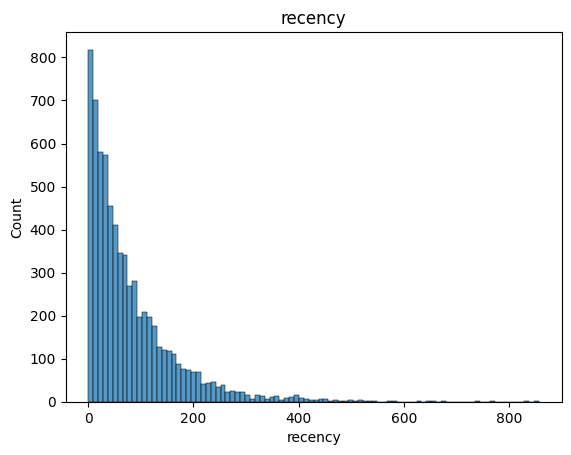

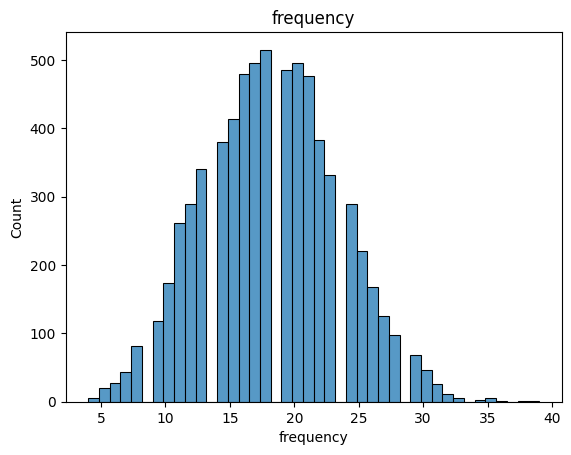

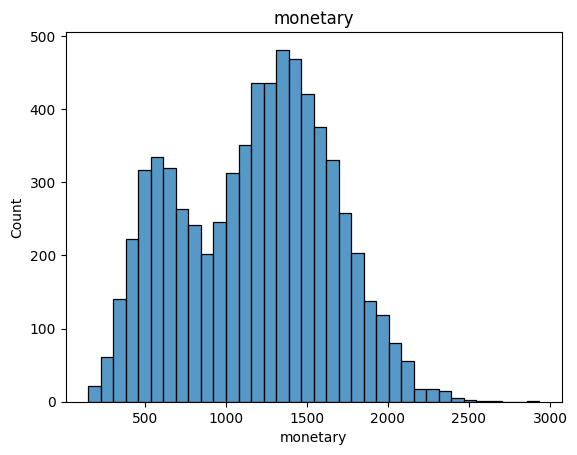

In [27]:
#Data Distribution
for col in eda_rfm.columns:
    x = eda_rfm[col]
    sns.histplot(x)
    plt.title(col)
    plt.show();

#**Clustering**#
*   Ranking Method
*   K-Means Clustering



**Ranking Method**

In [28]:
#copy data
data_bin = eda_rfm.copy()

In [29]:
def binning_rfm(df):
    """
    Function for binning the data for making ranking method

    Parameter
    ---------
    df : pandas dataframe
         dataframe input for binning method

    Return
    ------
    df : pandas dataframe
         output binned dataframe
    """
    # Calculate quantiles for each variable
    quantiles = df.quantile(q=[0.2, 0.4, 0.6, 0.8])

    # Create bins for each variable
    r_bins = [-np.inf] + list(quantiles['recency']) + [np.inf]
    f_bins = [-np.inf] + list(quantiles['frequency']) + [np.inf]
    m_bins = [-np.inf] + list(quantiles['monetary']) + [np.inf]

    # Create labels for the bins
    labels = [1, 2, 3, 4, 5]

    # label for recency (lower recency, higher ranking)
    labels_r = [5, 4, 3, 2, 1]

    # Bin each variable into five groups
    df['R_Group'] = pd.cut(df['recency'], bins=r_bins, labels=labels_r).astype(int)
    df['F_Group'] = pd.cut(df['frequency'], bins=f_bins, labels=labels).astype(int)
    df['M_Group'] = pd.cut(df['monetary'], bins=m_bins, labels=labels).astype(int)

    # RFM score with average
    df['RFM_Score'] = np.round((df['R_Group']+df['F_Group']+df['M_Group'])/3,2)

    return df

In [30]:
#bin the data
data_bin = binning_rfm(data_bin)

In [31]:
#check the data
data_bin.head()

,recency,frequency,monetary,R_Group,F_Group,M_Group,RFM_Score
customer_id,,,,,,,
CS1112,61.0,15,1012.0,3,2,2,2.33
CS1113,35.0,20,1490.0,4,4,4,4.00
CS1114,32.0,19,1432.0,4,3,4,3.67
CS1115,11.0,22,1659.0,5,4,5,4.67
CS1116,203.0,13,857.0,1,1,2,1.33


In [32]:
#check data type
data_bin.dtypes

recency      float64
frequency      int64
monetary     float64
R_Group        int64
F_Group        int64
M_Group        int64
RFM_Score    float64
dtype: object

In [33]:
#check descriptive stats
data_bin.describe()

,recency,frequency,monetary,R_Group,F_Group,M_Group,RFM_Score
count,6889.000000,6889.000000,6889.000000,6889.000000,6889.000000,6889.000000,6889.000000
mean,80.538249,18.143998,1179.223835,3.016258,2.847728,2.998258,2.953964
std,85.382526,5.193150,465.833636,1.424146,1.434156,1.414520,1.130217
min,0.000000,4.000000,149.000000,1.000000,1.000000,1.000000,1.000000
25%,22.000000,14.000000,781.000000,2.000000,1.000000,2.000000,2.000000
50%,53.000000,18.000000,1227.000000,3.000000,3.000000,3.000000,3.000000
75%,111.000000,22.000000,1520.000000,4.000000,4.000000,4.000000,4.000000
max,857.000000,39.000000,2933.000000,5.000000,5.000000,5.000000,5.000000


In [34]:
def assign_segment(rfm_df):
    """
    function to assign RFM_score to segment

    Parameter
    ---------
    rfm_df : pandas DataFrame
        preprocessed and binned rfm dataframe

    Return
    ------
    rfm_df : pandas dataframe
        dataframe with segment labels
    """
    # Assign segment names
    labels = ['At Risk Customers',
              'Potential Customers', 'Loyal Customers'
              ]

    rfm_df['Segment'] = pd.cut(rfm_df['RFM_Score'],
                               bins = [0, 1, 2, 3],
                               labels = labels)
    return rfm_df

In [35]:
# create label
data_bin = assign_segment(data_bin)

In [36]:
# check the data
data_bin.head()

,recency,frequency,monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
customer_id,,,,,,,,
CS1112,61.0,15,1012.0,3,2,2,2.33,Loyal Customers
CS1113,35.0,20,1490.0,4,4,4,4.00,NaN
CS1114,32.0,19,1432.0,4,3,4,3.67,NaN
CS1115,11.0,22,1659.0,5,4,5,4.67,NaN
CS1116,203.0,13,857.0,1,1,2,1.33,Potential Customers


In [37]:
# check data bin with RFM score > 4
data_bin[data_bin['RFM_Score'] > 4]

,recency,frequency,monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
customer_id,,,,,,,,
CS1115,11.0,22,1659.0,5,4,5,4.67,NaN
CS1120,10.0,24,1677.0,5,5,5,5.00,NaN
CS1127,39.0,24,1676.0,4,5,5,4.67,NaN
CS1138,13.0,24,1863.0,5,5,5,5.00,NaN
CS1141,53.0,25,1778.0,3,5,5,4.33,NaN
...,...,...,...,...,...,...,...,...
CS6102,4.0,26,1685.0,5,5,5,5.00,NaN
CS6105,56.0,25,1659.0,3,5,5,4.33,NaN
CS7394,5.0,25,1198.0,5,5,3,4.33,NaN


In [38]:
# check data bin with RFM score 3 - 4
data_bin[(data_bin['RFM_Score'] > 3) & (data_bin['RFM_Score'] <= 4)]

,recency,frequency,monetary,R_Group,F_Group,M_Group,RFM_Score,Segment
customer_id,,,,,,,,
CS1113,35.0,20,1490.0,4,4,4,4.00,NaN
CS1114,32.0,19,1432.0,4,3,4,3.67,NaN
CS1119,11.0,15,1158.0,5,2,3,3.33,NaN
CS1121,41.0,26,1524.0,3,5,4,4.00,NaN
CS1128,75.0,26,1921.0,2,5,5,4.00,NaN
...,...,...,...,...,...,...,...,...
CS8893,5.0,20,813.0,5,4,2,3.67,NaN
CS8899,14.0,19,841.0,5,3,2,3.33,NaN
CS8918,9.0,19,762.0,5,3,2,3.33,NaN


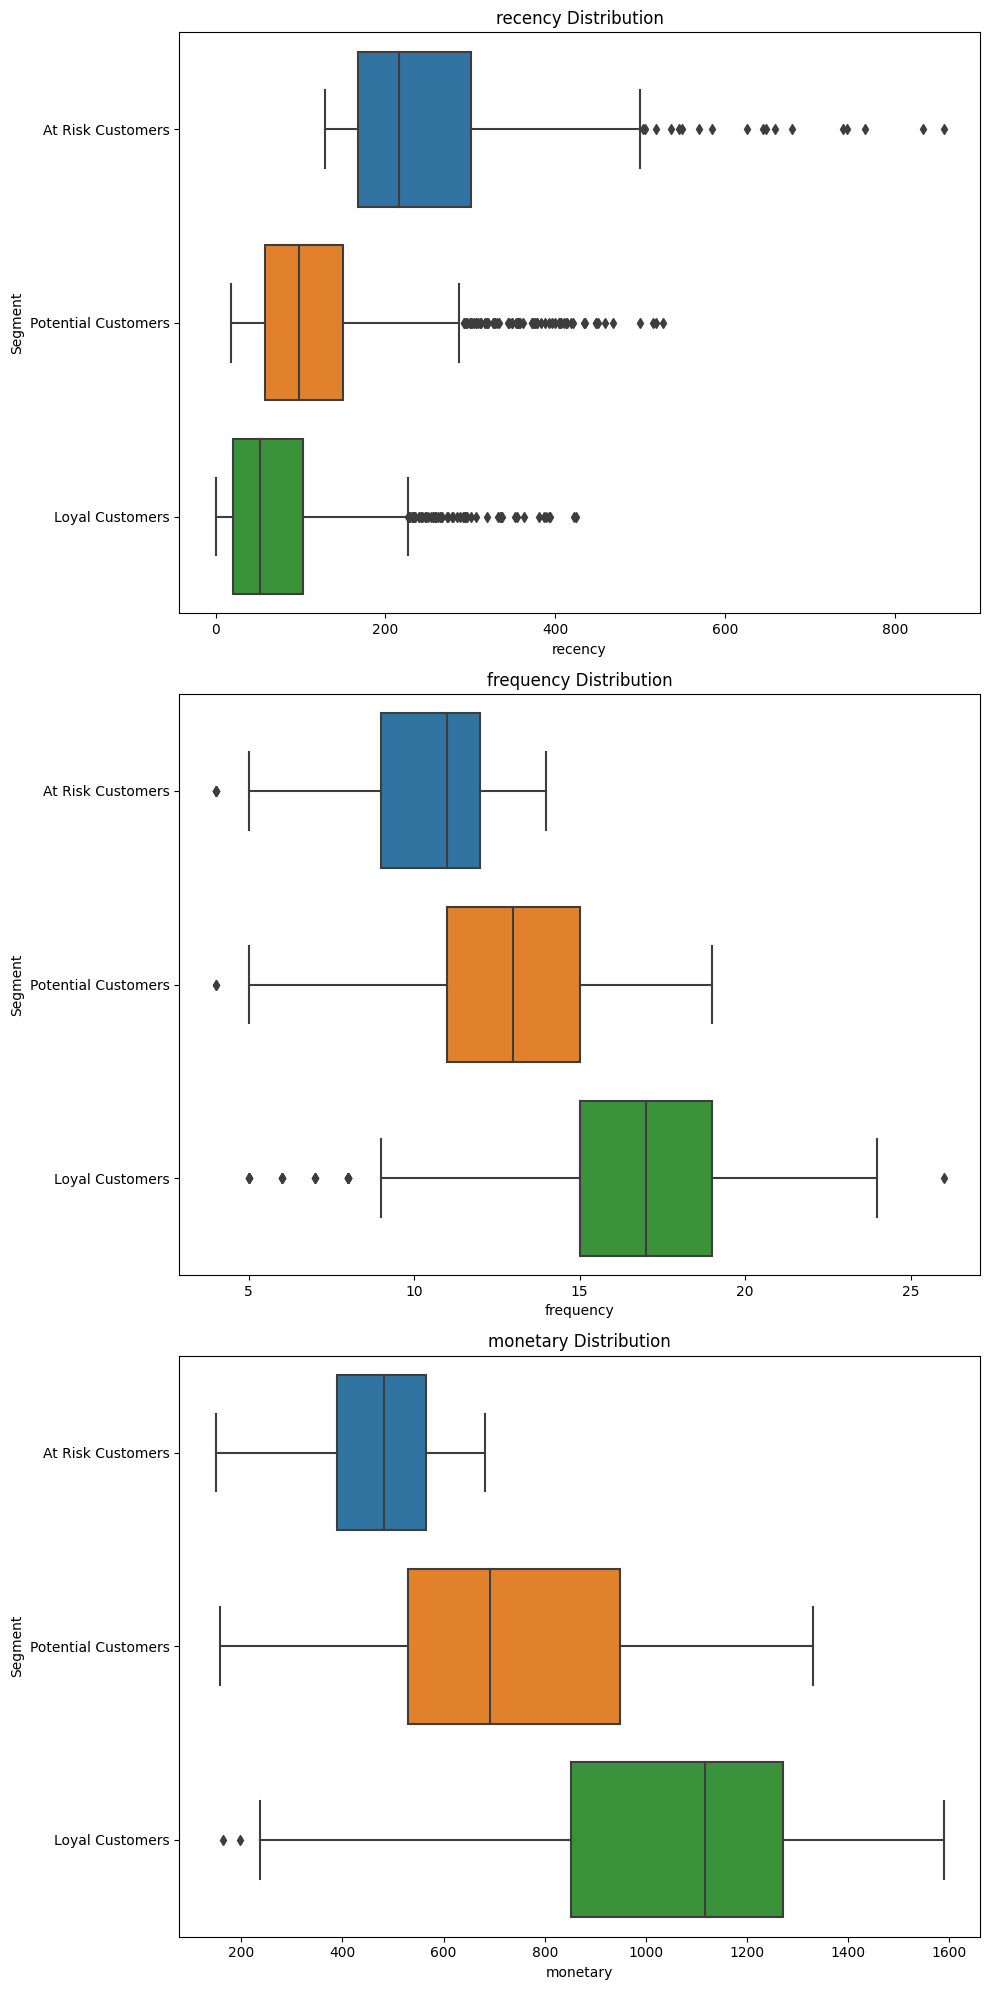

In [39]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['recency', 'frequency', 'monetary']):
    sns.boxplot(data = data_bin,
                y = 'Segment',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

In [40]:
# groupby to get aggregate mean of each RFM variable
data_bin.groupby('Segment').agg({'recency':'mean',
                                 'frequency':'mean',
                                 'monetary':'mean'}).round(2)

,recency,frequency,monetary
Segment,,,
At Risk Customers,254.87,10.51,473.01
Potential Customers,117.54,13.25,731.04
Loyal Customers,71.86,16.73,1059.37


**K-Means Clustering**

In [41]:
#import package
from sklearn.cluster import KMeans

In [42]:
#copy data
data_clean = eda_rfm.copy()

In [43]:
data_cluster_clean = data_clean[['recency', 'frequency', 'monetary']]

In [44]:
# Set empty list
inertia = []

# iterate for
for k in range(1, 11):
    # create
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    # fit object
    kmeans.fit(data_cluster_clean)

    # append results
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method Showing the Optimal K')

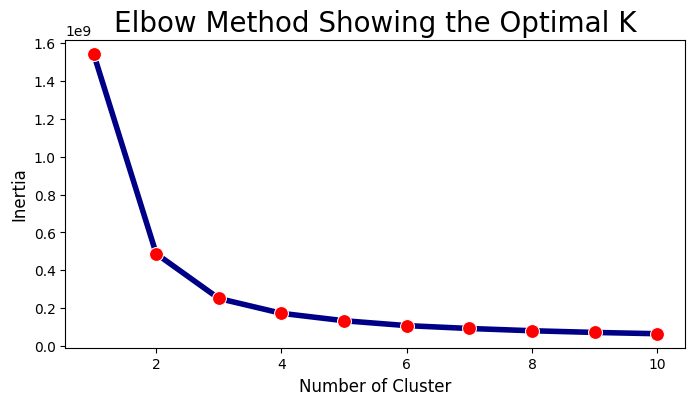

In [45]:
plt.figure(figsize=(8, 4))

# plt.plot(inertia)
sns.lineplot(x=range(1, 11), y=inertia, color='#000087',
             linewidth = 4, marker='o', markersize=10,
             markerfacecolor='red')

plt.xlabel('Number of Cluster', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method Showing the Optimal K', fontsize=20)

In [46]:
# K-Means Clustering
# Refit best data
kmeans_best = KMeans(n_clusters = 4,
                     random_state = 42,
                     n_init = 10) # Number of times the k-means algorithm will be run with different initial centroids

# fit
kmeans_best.fit(data_cluster_clean)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [47]:
# Predict
data_label = kmeans_best.predict(data_cluster_clean)
data_label

array([1, 2, 2, ..., 3, 3, 3], dtype=int32)

In [48]:
# Get the coordinates of the centroids
centroids = kmeans_best.cluster_centers_

In [49]:
# create dataframe
centroid_df = pd.DataFrame(centroids,
                           columns=['Recency', 'Frequency', 'Monetary']).rename_axis('Cluster', axis='index')

# show dataframe centroid
centroid_df

,Recency,Frequency,Monetary
Cluster,,,
0,51.303215,25.733275,1845.597741
1,82.596756,16.274623,1062.535342
2,66.083067,20.455956,1433.643542
3,114.457990,12.337177,562.515651


In [50]:
# ANalysis
# Build data
data_cluster = data_clean[['recency', 'frequency', 'monetary']]
data_cluster['label'] = data_label
data_cluster.head()

,recency,frequency,monetary,label
customer_id,,,,
CS1112,61.0,15,1012.0,1
CS1113,35.0,20,1490.0,2
CS1114,32.0,19,1432.0,2
CS1115,11.0,22,1659.0,0
CS1116,203.0,13,857.0,1


In [51]:
# Calculate average values for each RFM_Level, and return a size of each segment
data_cluster.groupby('label').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'label':'count',
}).round(1)

,recency,frequency,monetary,label
label,,,,
0,51.3,25.7,1845.4,1152
1,82.5,16.3,1063.1,1727
2,66.1,20.5,1433.8,2187
3,114.5,12.3,562.8,1823


In [52]:
# Function to assign label
def assign_label(val):
    """Function to assign label"""
    if val == 0:
        return 'Average Customer'
    elif val == 1:
        return 'At Risk Customer'
    else:
        return 'Best Customer'

# Create a new column 'Customer_Type' based on 'K_cluster' values
data_cluster['Customer_Type'] = data_cluster['label'].apply(assign_label)

# check result
data_cluster.head()

,recency,frequency,monetary,label,Customer_Type
customer_id,,,,,
CS1112,61.0,15,1012.0,1,At Risk Customer
CS1113,35.0,20,1490.0,2,Best Customer
CS1114,32.0,19,1432.0,2,Best Customer
CS1115,11.0,22,1659.0,0,Average Customer
CS1116,203.0,13,857.0,1,At Risk Customer


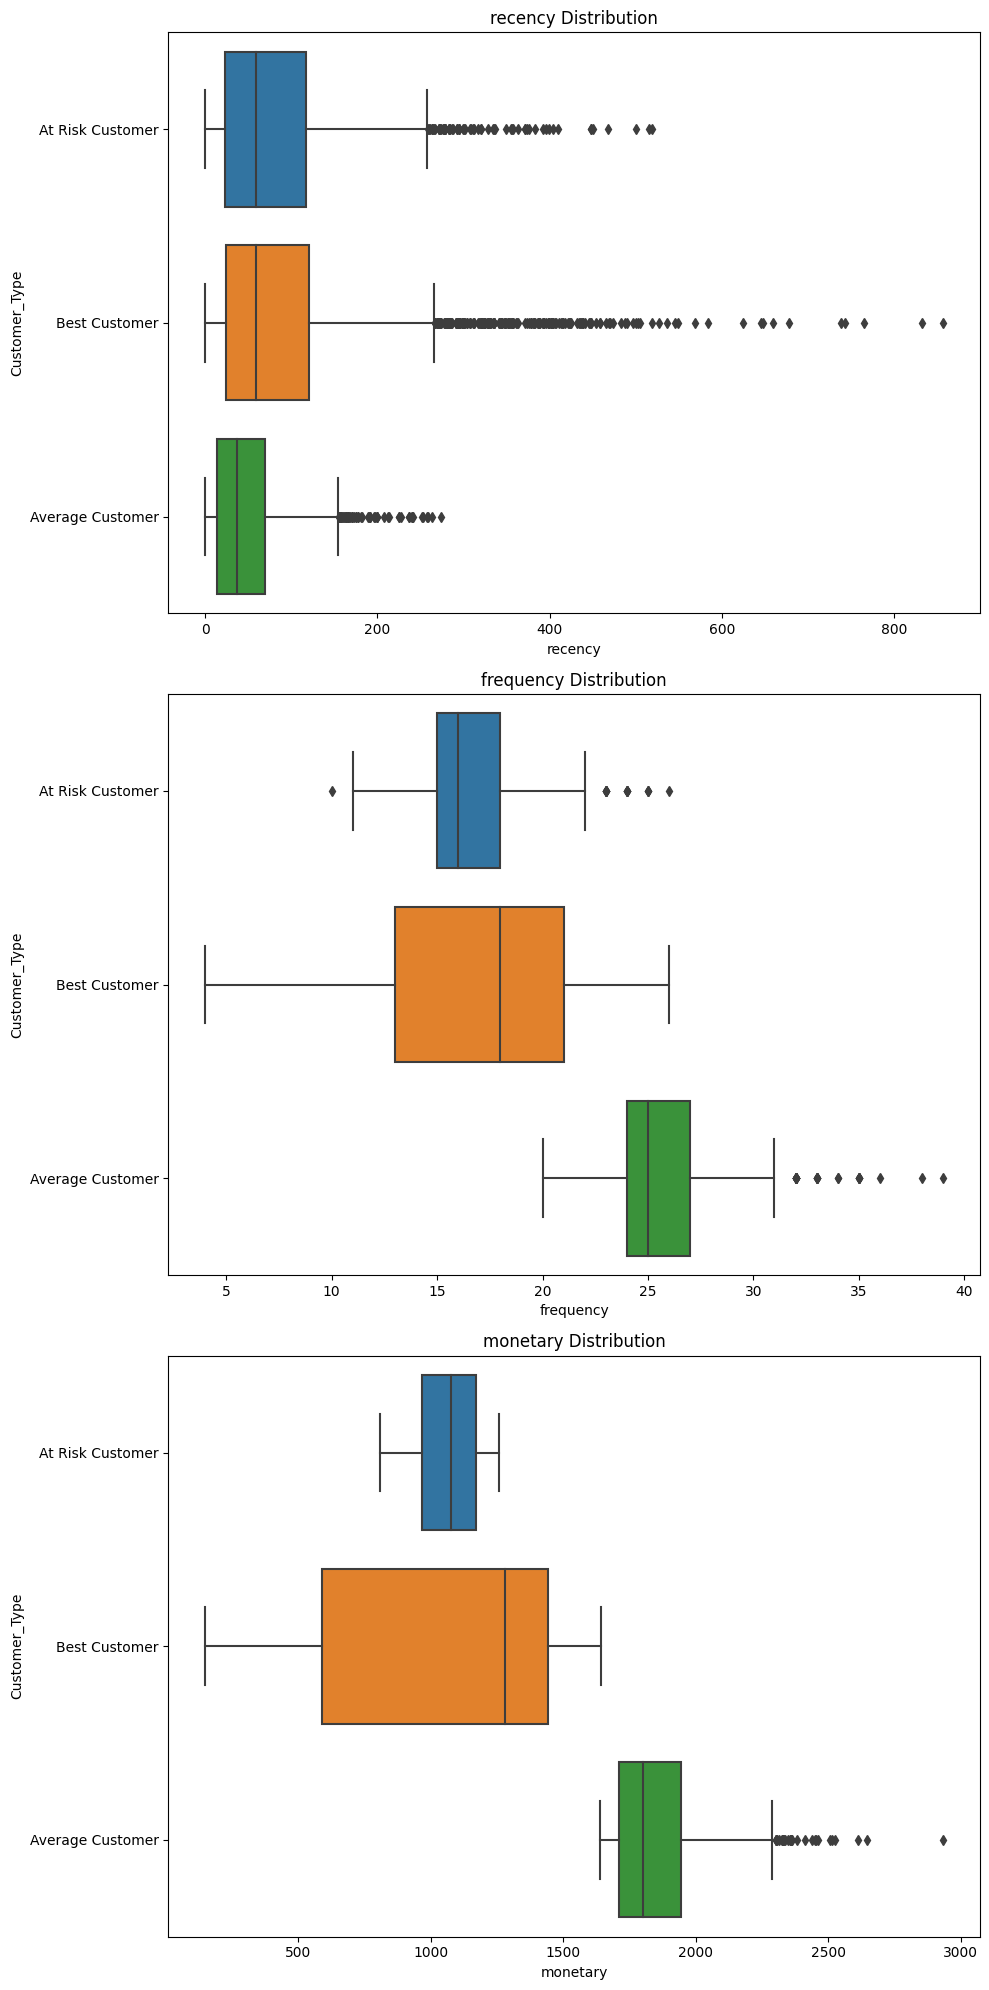

In [53]:
# Plot with boxplot
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))

# Iterate over column
for i, col in enumerate(['recency', 'frequency', 'monetary']):
    sns.boxplot(data = data_cluster,
                y = 'Customer_Type',
                x = col,
                ax = axes[i])

    axes[i].set_title(f'{col} Distribution')

plt.tight_layout()
plt.show()

#**In Depth Analysis**#


In [54]:
# Apply inverse scaling to the data_clean DataFrame
data_clean_ori = pd.DataFrame(data_clean)

# Assign the original index to the new DataFrame
data_clean_ori.index = data_clean.index

 # Assign the original column names to the new DataFrame
data_clean_ori.columns = data_clean.columns

In [55]:
# show the clean data
data_clean_ori.head()

,recency,frequency,monetary
customer_id,,,
CS1112,61.0,15,1012.0
CS1113,35.0,20,1490.0
CS1114,32.0,19,1432.0
CS1115,11.0,22,1659.0
CS1116,203.0,13,857.0


In [56]:
# show desc stats
data_clean_ori.describe()

,recency,frequency,monetary
count,6889.000000,6889.000000,6889.000000
mean,80.538249,18.143998,1179.223835
std,85.382526,5.193150,465.833636
min,0.000000,4.000000,149.000000
25%,22.000000,14.000000,781.000000
50%,53.000000,18.000000,1227.000000
75%,111.000000,22.000000,1520.000000
max,857.000000,39.000000,2933.000000


Text(0.5, 1.0, 'Recency Distribution')

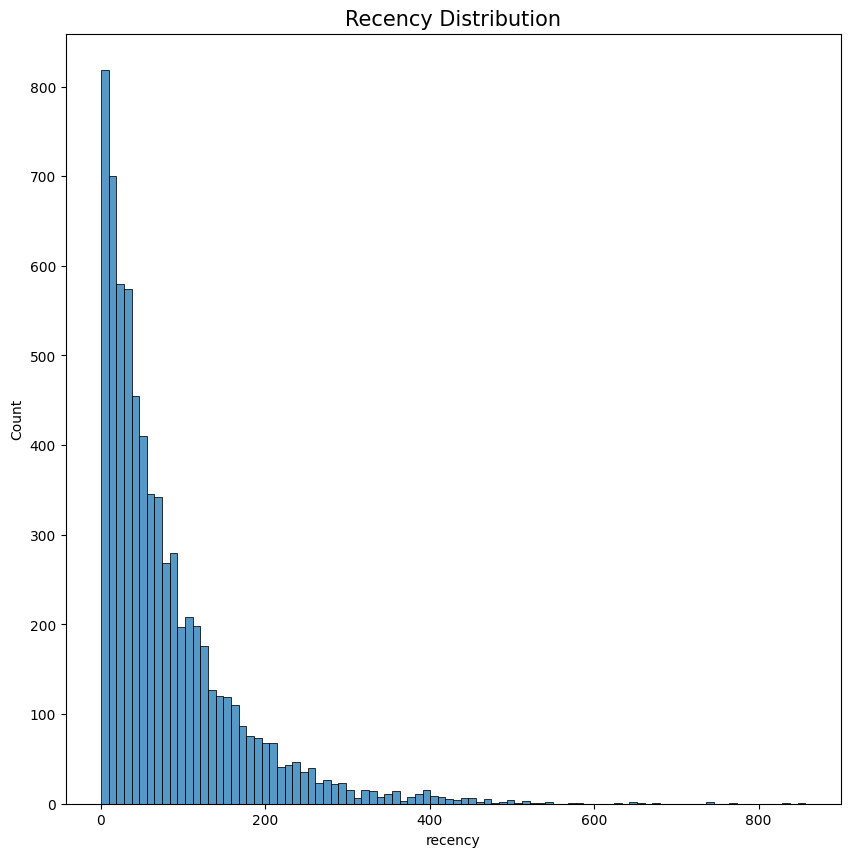

In [57]:
# Plot recency
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['recency'])
plt.title('Recency Distribution', fontsize=15)

Text(0.5, 1.0, 'Frequency Distribution')

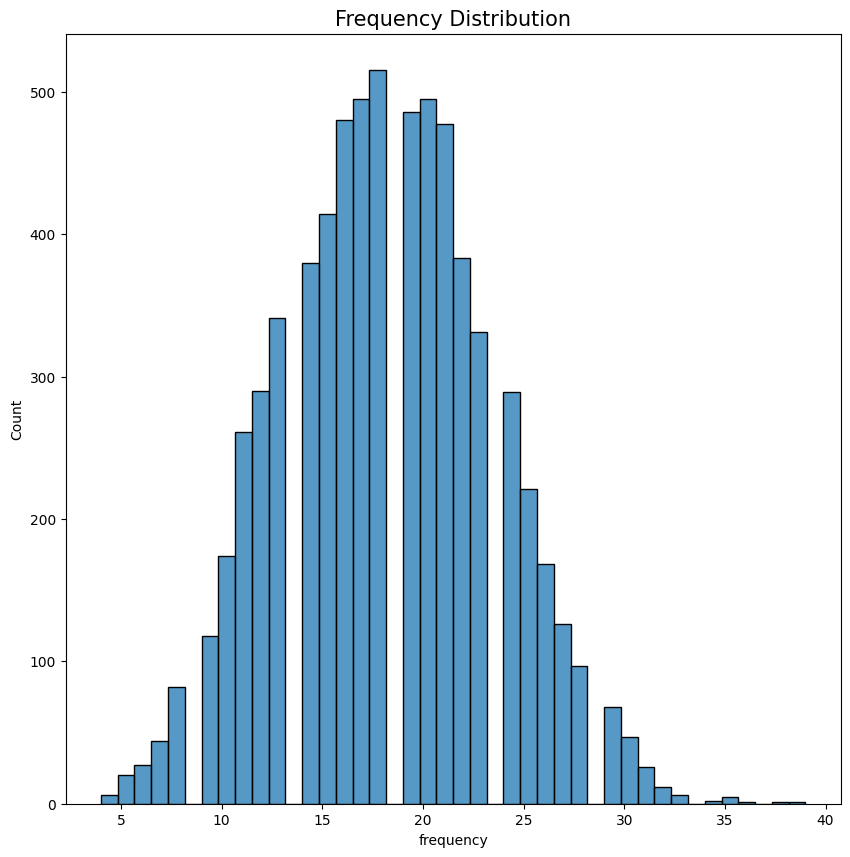

In [58]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['frequency'])
plt.title('Frequency Distribution', fontsize=15)

Text(0.5, 1.0, 'Monetary Distribution')

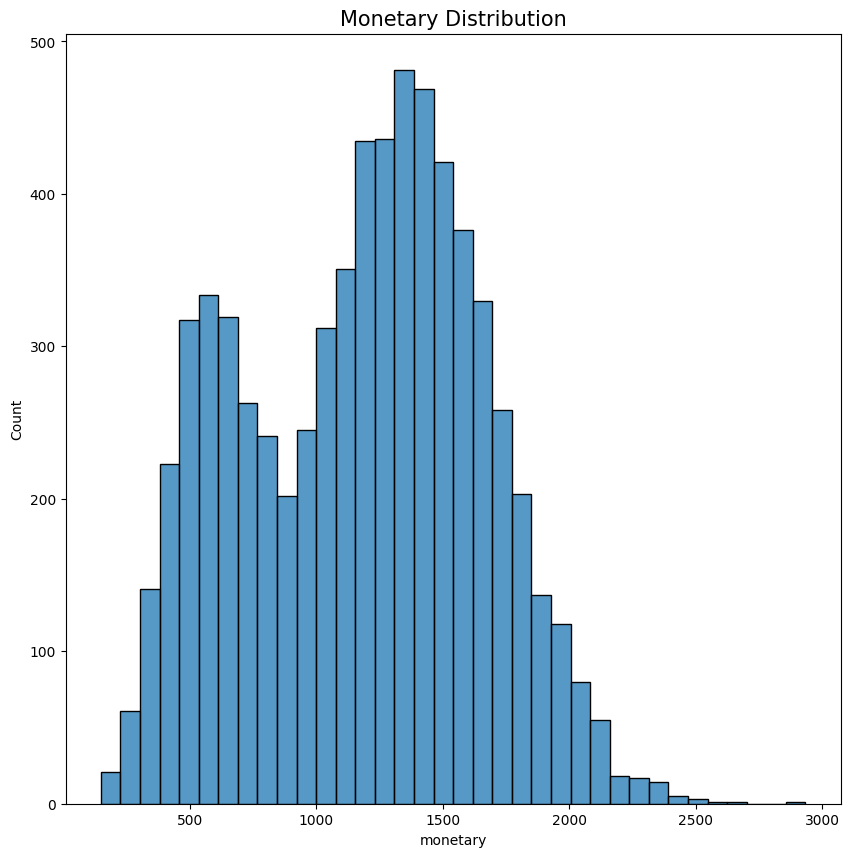

In [59]:
# Plot monetary
plt.figure(figsize=(10,10))
sns.histplot(data_clean_ori['monetary'])
plt.title('Monetary Distribution', fontsize=15)
#plt.xlim(0,40000)

In [60]:
#RFM with actual values
# show clustered data
data_cluster.head()

,recency,frequency,monetary,label,Customer_Type
customer_id,,,,,
CS1112,61.0,15,1012.0,1,At Risk Customer
CS1113,35.0,20,1490.0,2,Best Customer
CS1114,32.0,19,1432.0,2,Best Customer
CS1115,11.0,22,1659.0,0,Average Customer
CS1116,203.0,13,857.0,1,At Risk Customer


In [61]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_datas_agg = data_cluster.groupby('Customer_Type').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'label':'count',
}).round(1)

# rename
rfm_datas_agg.columns = ['recency', 'frequency', 'monetary', 'Count Customers']

In [62]:
# show data
rfm_datas_agg

,recency,frequency,monetary,Count Customers
Customer_Type,,,,
At Risk Customer,82.5,16.3,1063.1,1727
Average Customer,51.3,25.7,1845.4,1152
Best Customer,88.1,16.8,1037.8,4010


In [63]:
# create percentage revenue per segments
rfm_datas_agg['pctg revenue'] = np.round(rfm_datas_agg['monetary']*rfm_datas_agg['Count Customers']/(rfm_datas_agg['monetary']*rfm_datas_agg['Count Customers']).sum()*100,2)

#show data
rfm_datas_agg

,recency,frequency,monetary,Count Customers,pctg revenue
Customer_Type,,,,,
At Risk Customer,82.5,16.3,1063.1,1727,22.60
Average Customer,51.3,25.7,1845.4,1152,26.17
Best Customer,88.1,16.8,1037.8,4010,51.23


In [64]:
# create copy
customer_segments = data_cluster.copy().reset_index()

# use customer id and customer type
customer_segments = customer_segments[['customer_id', 'Customer_Type']]

# show data
customer_segments.head()

,customer_id,Customer_Type
0,CS1112,At Risk Customer
1,CS1113,Best Customer
2,CS1114,Best Customer
3,CS1115,Average Customer
4,CS1116,At Risk Customer


In [65]:
# copy data
trx_df = data.copy()

# drop missing values
trx_df = trx_df.dropna()


# show data
trx_df.head()

,customer_id,trans_date,tran_amount
0,CS5295,2013-02-11,35.0
1,CS4768,2015-03-15,39.0
2,CS2122,2013-02-26,52.0
3,CS1217,2011-11-16,99.0
4,CS1850,2013-11-20,78.0


In [66]:
# Merge the 'trx_df' DataFrame with the 'customer_segments' DataFrame on the 'Customer ID' column
trx_df = trx_df.merge(customer_segments[['customer_id', 'Customer_Type']], on='customer_id', how='left')

In [67]:
# shanity check
trx_df.head()

,customer_id,trans_date,tran_amount,Customer_Type
0,CS5295,2013-02-11,35.0,Best Customer
1,CS4768,2015-03-15,39.0,Average Customer
2,CS2122,2013-02-26,52.0,Average Customer
3,CS1217,2011-11-16,99.0,Best Customer
4,CS1850,2013-11-20,78.0,Average Customer


In [68]:
# check missing values
trx_df.isna().sum()

customer_id      0
trans_date       0
tran_amount      0
Customer_Type    0
dtype: int64

In [69]:
# let's check customer ID that missing in customer_segments data
customer_segments[customer_segments['customer_id']==17364]

,customer_id,Customer_Type


In [70]:
# let's check customer ID that missing in customer_segments data 2
customer_segments[customer_segments['customer_id']==16873]

,customer_id,Customer_Type


In [71]:
# group by customer_type
grouped_segment = trx_df.groupby('Customer_Type').agg({'tran_amount':['min','mean','max']})

# show the data
grouped_segment

tran_amount                  
                         min       mean    max
Customer_Type                                 
At Risk Customer        10.0  65.307320  105.0
Average Customer        35.0  71.719992  105.0
Best Customer           10.0  61.895044  105.0